# How has Seattle weather changed in the last 70 years?

## 1. Introduction

### Background
For many years, climate change has been an area of focus for environmental groups, governments and concerned citizens around the globe. In recent years, extreme weather has been blamed for an increase in the number (and severity) of natural disasters ranging from wild fires to hurricanes to flash flooding.

The purpose of this project is to focus on a single city in the US, Seattle, with a goal of answering the question... "*How has Seattle weather changed in the past 70 years?*" The decision to focus on Seattle is purely based on the fact that it happens to be where I live and have lived for the past 20 years. Anecdotally speaking, I *feel* like Seattle weather has changed noticibly over that short timeframe. But will the data bear that out? And... beyond 20 years, what are the trends over the last several decades?

### Dataset
The dataset for this project comes from [NOAA](https://www.ncdc.noaa.gov/cdo-web/) (National Oceanic and Atmospheric Administration). This dataset includes a variety of daily weather attributes recorded at one specific weather station (i.e., Seattle-Tacoma Airport) starting in 1948 through 2020. 

For this project, we'll utilize the following data fields:

* `SNOW` - Snowfall
* `PRCP` - Precipitation
* `WSFG` - Peak gust wind speed
* `TMAX` - Maximum temperature
* `TMIN` - Minimum temperature

### Key Questions
In this project, we aim to answer the overall question - "How has Seattle weather changed in the last 70 years?". To answer this question, we'll focus on answering a few key sub-questions with the data:

1. Is the daily temperature (high and low) changing over time? 
2. Seattle is known as the rainy city, but is it getting more or less rainy over the past 70 years?
3. Are there more **extreme** weather events now vs. 70 years ago?

Let's dig in!


## 2 Setup

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

### Data Load and Preview

In [2]:
# Import data & preview
seattle_weather = pd.read_csv('2757387.csv')
seattle_weather.head()

STATION                           NAME        DATE  AWND  FMTM  PGTM  \
0  USW00024233  SEATTLE TACOMA AIRPORT, WA US  1948-01-01   NaN   NaN   NaN   
1  USW00024233  SEATTLE TACOMA AIRPORT, WA US  1948-01-02   NaN   NaN   NaN   
2  USW00024233  SEATTLE TACOMA AIRPORT, WA US  1948-01-03   NaN   NaN   NaN   
3  USW00024233  SEATTLE TACOMA AIRPORT, WA US  1948-01-04   NaN   NaN   NaN   
4  USW00024233  SEATTLE TACOMA AIRPORT, WA US  1948-01-05   NaN   NaN   NaN   

   PRCP  PSUN  SNOW  SNWD  ...  WDF1  WDF2  WDF5  WDFG  WDFM  WSF1  WSF2  \
0  0.47   NaN   0.0   0.0  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1  0.59   NaN   0.0   0.0  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2  0.42   NaN   0.0   0.0  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3  0.31   NaN   0.0   0.0  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4  0.17   NaN   0.0   0.0  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

   WSF5  WSFG  WSFM  
0   NaN   NaN   NaN  
1   NaN   NaN   NaN  
2   NaN   NaN   NaN  
3   NaN   NaN   NaN  
4   NaN   NaN   NaN  

[5 rows x 24 columns]

In [3]:
seattle_weather.shape

(26664, 24)

In [4]:
seattle_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26664 entries, 0 to 26663
Data columns (total 24 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  26664 non-null  object 
 1   NAME     26664 non-null  object 
 2   DATE     26664 non-null  object 
 3   AWND     13513 non-null  float64
 4   FMTM     9972 non-null   float64
 5   PGTM     13580 non-null  float64
 6   PRCP     26661 non-null  float64
 7   PSUN     6821 non-null   float64
 8   SNOW     22219 non-null  float64
 9   SNWD     22253 non-null  float64
 10  TAVG     5505 non-null   float64
 11  TMAX     26664 non-null  int64  
 12  TMIN     26664 non-null  int64  
 13  TSUN     12642 non-null  float64
 14  WDF1     1377 non-null   float64
 15  WDF2     8949 non-null   float64
 16  WDF5     8749 non-null   float64
 17  WDFG     8764 non-null   float64
 18  WDFM     9363 non-null   float64
 19  WSF1     1377 non-null   float64
 20  WSF2     8949 non-null   float64
 21  WSF5     874

## 3. Data Wrangling

To prepare our data for further analysis, we'll complete the following data wrangling steps:
1. Drop unnecessary columns (To answer our questions, we only need a subset of the columns)
2. Convert the 'DATE' column to datetime and set it as the index
3. Drop rows older than 1950

### Remove Unnecessary Columns
To answer our key questions, we can remove a number of columns from the dataset which are not applicable.

In [5]:
# Drop unnecessary columns and columns with large number of missing values
seattle_weather = seattle_weather.dropna(thresh=8765, axis=1)
seattle_weather.drop(columns=['STATION', 'NAME', 'SNWD', 'FMTM', 'TSUN', 'WSFM',
                              'WDF2', 'WDFM', 'WSF2', 'PGTM', 'AWND'], inplace=True)

### Convert Date to DateTime and Extract Day, Month and Year

In [6]:
# Convert date column to datetime format and set DATE col as index
seattle_weather['DATE'] = pd.to_datetime(seattle_weather.DATE)
seattle_weather = seattle_weather.set_index('DATE')

# Check the result
seattle_weather.head()

PRCP  SNOW  TMAX  TMIN  WSFG
DATE                                    
1948-01-01  0.47   0.0    51    42   NaN
1948-01-02  0.59   0.0    45    36   NaN
1948-01-03  0.42   0.0    45    35   NaN
1948-01-04  0.31   0.0    45    34   NaN
1948-01-05  0.17   0.0    45    32   NaN

### Drop Columns Older Than 1950
Since we are only concerned with looking at 70 years worth of weather data for this project, we can drop the rows with dates older than 1950-01-01. 

In [7]:
seattle_weather = seattle_weather[seattle_weather.index.year > 1949]

In [8]:
seattle_weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 25933 entries, 1950-01-01 to 2020-12-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PRCP    25930 non-null  float64
 1   SNOW    21489 non-null  float64
 2   TMAX    25933 non-null  int64  
 3   TMIN    25933 non-null  int64  
 4   WSFG    8765 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 1.2 MB


## 4 Exploratory Data Analysis

So after data wrangling, we see that we still have a number of missing values for two columns - SNOW and WSFG. For the purposes of this exploration, that shouldn't matter much, but we will need to keep this in mind during our data analysis.

Next, let's explore our data to establish a baseline understanding before we start answering our key questions form above.

### Data Distributions
First, let's plot a histogram of each of our remaining columns to get a feel for how our data is distributed.

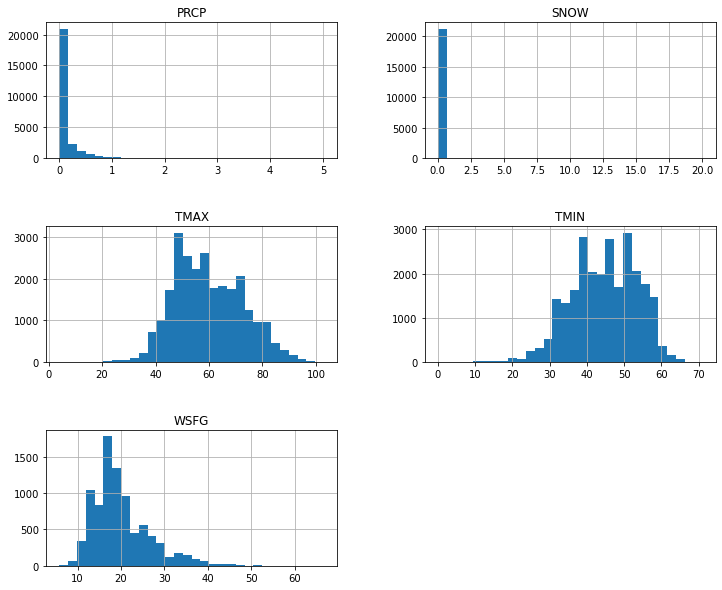

In [23]:
seattle_weather.hist(figsize=(12,10), bins=30)
plt.subplots_adjust(hspace=0.5)
plt.show()

We see a range of distributions for our columns. PRCP (precipitation) and SNOW both appear to be extremely right skewed with the majority of values very close to zero. This is not surprising for SNOW since Seattle is not a very snowy city, but it is somewhat surprising for precipitation.

TMAX (daily high temp) and TMIN (daily low temp) are both relatively normal in shape. And WSFG (max wind gust speed) is closer to normal than PRCP and SNOW, but still appears to be more right skewed. 

This view doesn't give us a sense of trends or much of a sense of the number of extreme values, so we'll have to dig into both later on.

### Summary Statistics
Building on the distributions, let's take a look at the summary statistics for our data to see if anything stands out before we move on to answering our questions.

In [24]:
seattle_weather.describe()

PRCP          SNOW          TMAX          TMIN         WSFG
count  25930.000000  21489.000000  25933.000000  25933.000000  8765.000000
mean       0.106084      0.028889     59.671962     44.704354    19.963286
std        0.239249      0.349624     12.771839      8.879648     6.617026
min        0.000000      0.000000      4.000000      0.000000     5.800000
25%        0.000000      0.000000     50.000000     38.000000    15.000000
50%        0.000000      0.000000     58.000000     45.000000    18.300000
75%        0.100000      0.000000     69.000000     52.000000    23.000000
max        5.020000     20.000000    103.000000     71.000000    66.700000

Looking at the summary statistics, we can make a couple of additional observations that were not evident when looking at the distributions.

1. For PRCP and SNOW, it's not surpising that our median values are zero. However, we can also see that in each case, our max values represent fairly extreme deviations from the norm. In the case of PRCP, the max value of 5 is over 20 standard deviations from our mean value and in the case of SNOW, the max is **57 sta7ndard deviations** above the mean. Granted, if we for the month, we would have a fairer comparison of values, but in any case, we do have some number of extreme weather events happening over the 70 year time frame.
2. The max values for TMAX, TMIN and WSFG also appear to be on the *extreme* side, although less so when compared to SNOW and PRCP.

## 5 Key Questions
Next, let move on to answering the key questions.

### Question 1 - Is the daily temperature (high and low) changing over time?
Let's start by plotting the high and low temps separately to get a feel for the overall trends for each. 

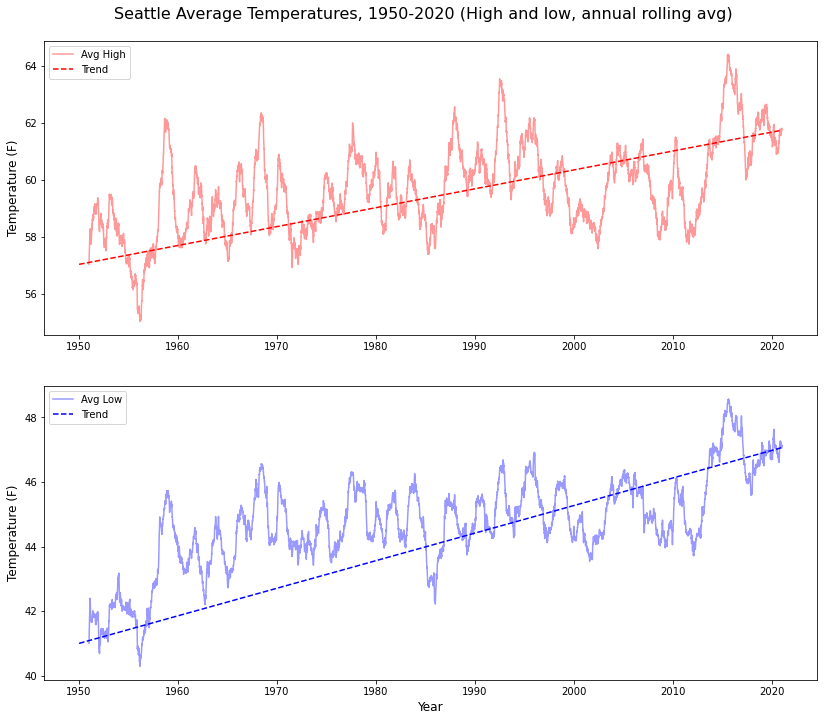

In [70]:
# Create figure and layout
fig, ax = plt.subplots(2, 1, figsize=(12, 10))
fig.tight_layout(pad=3)
plt.suptitle("Seattle Average Temperatures, 1950-2020 (High and low, annual rolling avg)", size=16, x=0.5, y=1)

# Plot annual rolling average for high temperature
ax[0].plot(seattle_weather.index, seattle_weather['TMAX'].rolling(365).mean(),
           color='r', alpha=0.4, label='Avg High')

# Plot trend line
avg_1950 = [seattle_weather.index.min(), seattle_weather[seattle_weather.index.year == 1950]['TMAX'].mean()]
avg_2020 = [seattle_weather.index.max(), seattle_weather[seattle_weather.index.year == 2020]['TMAX'].mean()]
ax[0].plot([avg_1950[0], avg_2020[0]], [avg_1950[1], avg_2020[1]], color='r', linestyle='--', label='Trend')

# Add labels and title
# ax[0].set_xlabel("Date", size=14)
ax[0].set_ylabel("Temperature (F)", size=12)
ax[0].legend()

# Plot annual rolling average for low temperature
ax[1].plot(seattle_weather.index, seattle_weather['TMIN'].rolling(365).mean(),
           color='b', alpha=0.4, label='Avg Low')

# Plot trend line
avg_1950 = [seattle_weather.index.min(), seattle_weather[seattle_weather.index.year == 1950]['TMIN'].mean()]
avg_2020 = [seattle_weather.index.max(), seattle_weather[seattle_weather.index.year == 2020]['TMIN'].mean()]
ax[1].plot([avg_1950[0], avg_2020[0]], [avg_1950[1], avg_2020[1]], color='b', linestyle='--', label='Trend')

# Add labels and title
ax[1].set_xlabel("Year", size=12)
ax[1].set_ylabel("Temperature (F)", size=12)
ax[1].legend()

plt.show()

Looking at the plots above, it seems clear that Seattle weather is warming over time. Applying the trend lines from 1950 to today may give us a false sense of how dramatic a change we are actually observing since the trend line doesn't pick up on the nuances of long-term cyclic temperature variation observed in the underlying data.

Before drawing any conclusions, let's make another plot to see if we can get a more realistic sense of the changes over time. To address this, we'll group by year and then create a regplot to fit a regression line to our annual averages.

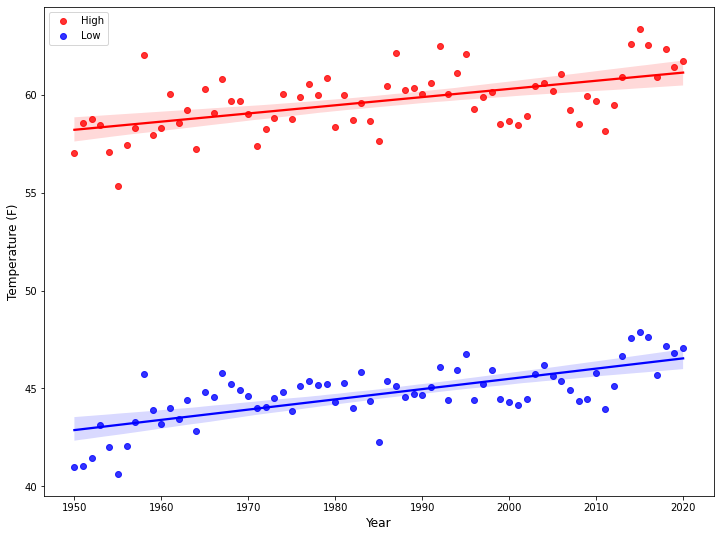

In [78]:
# Create figure
fig, ax = plt.subplots(figsize=(12,9))

# Plot high and low temps
sns.regplot(x=seattle_weather.YEAR.unique(), y=seattle_weather.groupby("YEAR")["TMAX"].mean(),
            color='r', fit_reg=True, label='High') 
sns.regplot(x=seattle_weather.YEAR.unique(), y=seattle_weather.groupby("YEAR")["TMIN"].mean(),
            color='b', fit_reg=True, label='Low') 

# Add title, labels, and display plot
ax.set_xlabel("Year", size=12)
ax.set_ylabel("Temperature (F)", size=12)
ax.legend(loc='upper left')

plt.show()

The plots above tell a similar story, that the temperature does seem to be increasing over time for both daily high and daily low temps. The regplot view presents a more realistic view of the year-over-year and long term trends for each data point.

**So is the daily temperature changing over time?**
The answer seems to be a clear **Yes** based on the plots above. Further, the amount of increase over the past 70 years appears to be on the order of ~2.5-3 degrees Fahrenheit for both the avg high and avg low.

### Question 2 - Is the Rainy City Getting Rainier?
To answer this question, we'll follow a similar approach as with temperature, but in this case, we only have one column to worry about which should simplify things a bit.

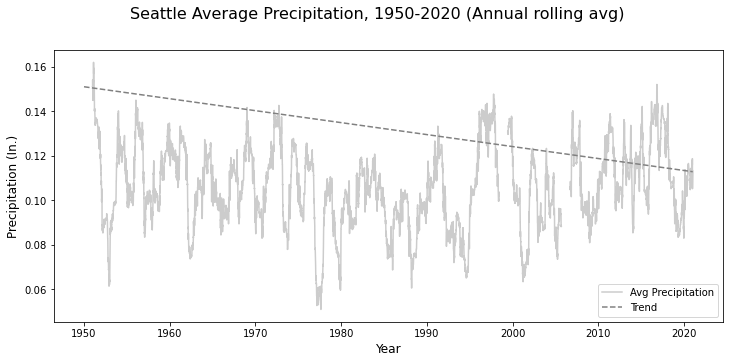

In [81]:
# Create figure and layout
fig, ax = plt.subplots(1, 1, figsize=(12, 5))
plt.suptitle("Seattle Average Precipitation, 1950-2020 (Annual rolling avg)", size=16, x=0.5, y=1)

# Plot annual rolling average for precipitation
ax.plot(seattle_weather.index, seattle_weather['PRCP'].rolling(365).mean(),
           color='gray', alpha=0.4, label='Avg Precipitation')

# Plot trend line
avg_1950 = [seattle_weather.index.min(), seattle_weather[seattle_weather.index.year == 1950]['PRCP'].mean()]
avg_2020 = [seattle_weather.index.max(), seattle_weather[seattle_weather.index.year == 2020]['PRCP'].mean()]
ax.plot([avg_1950[0], avg_2020[0]], [avg_1950[1], avg_2020[1]], color='gray', linestyle='--', label='Trend')

# Add labels and title
ax.set_xlabel("Year", size=12)
ax.set_ylabel("Precipitation (In.)", size=12)
ax.legend()

plt.show()

Interesting! The plot above seems to indicate that the overall trend is toward less annual precipitation. This could be good news for Seattlites. But let's take a look at the regplot and see if the trend holds up in that view as well.

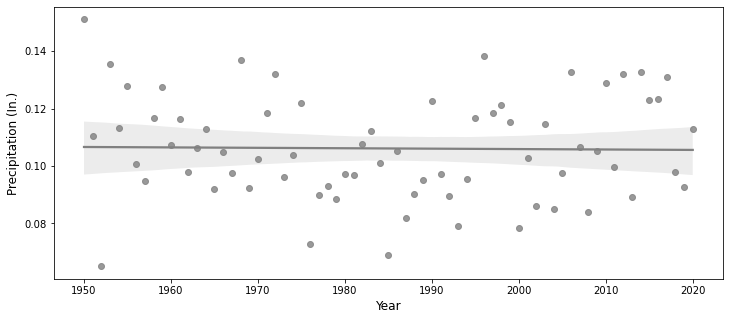

In [84]:
# Create figure
fig, ax = plt.subplots(figsize=(12,5))

# Plot high and low temps
sns.regplot(x=seattle_weather.YEAR.unique(), y=seattle_weather.groupby("YEAR")["PRCP"].mean(),
            color='gray', fit_reg=True) 

# Add title, labels, and display plot
ax.set_xlabel("Year", size=12)
ax.set_ylabel("Precipitation (In.)", size=12)

plt.show()

The regplot indicates that annual precipitation fluctuates quite a bit and there don't really appear to be any clear trends of significance. In addition, our above trend line seems to be affected by the fact that 1950 appears to have been an unusually wet year.

**So is Seattle getting more or less rain over the past 70 years??**
The answer seems to be that Seattle is getting roughly *the same* rain over the past 70 years (but it really all depends on the year) So we probably shouldn't get rid of our umbrellas and Gore-tex just yet!

### Question 3 - Is Seattle Weather Getting More EXTREME?
The news media loves to tell us about **extreme** weather events. Every winter it seems we have a new *Snow-magedon* to worry about. In addition, one of the hallmarks of climate change is a rise in extreme weather conditions. While this is undoubtedly happening in various places around the globe, is it happening in Seattle?

To answer this question, we'll need to take a different approach than we've taken so far whlie simply investigating trends. For each category, we'll need to establish a baseline for what makes a weather event *extreme* and then we can start counting by year to see if this number is increasing, decreasing, or staying the same. As we observed earlier, using the standard deviation may not help us much in all cases as some weather is much more likely to happen in certain months of the year and nearly impossible in other months (e.g., Snow). So we'll have to adjust for month in those cases to ensure we are fair in our classification of events as *extreme*.